# 1.1 Pandas

Pandas is a library for working with tabular data in python, you can think of it like excel in python. It intergrates smoothly with the rest of the ecosystem like plotting, databases and numpy. In this notebook we'll do a quick overview using a toy example.

In [2]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13, 8) #deault figure size

# Reading

Pandas isn't fussy we can pass a path to the csv file or even give it a url to a csv.

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Let's rename the columns

In [4]:
colnames = [
'Class',
'Alcohol',
'Malic_acid',
'Ash',
'Alcalinity_of_ash',  
'Magnesium',
'Total_phenols',
'Flavanoids',
'Nonflavanoid_phenols',
'Proanthocyanins',
'Color_intensity',
'Hue',
'OD280_by_OD315', 
'Proline']            

df.columns = colnames

In [5]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_by_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.sample(3) # show 3 random samples

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_by_OD315,Proline
57,1,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.0,1.07,2.84,1270
38,1,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.7,1.18,2.69,1020
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380


We can check the datatype of the columns using `.dtypes`

In [41]:
df.dtypes

Class                     int64
Alcohol                 float64
Malic_acid              float64
Ash                     float64
Alcalinity_of_ash       float64
Magnesium                 int64
Total_phenols           float64
Flavanoids              float64
Nonflavanoid_phenols    float64
Proanthocyanins         float64
Color_intensity         float64
Hue                     float64
OD280_by_OD315          float64
Proline                   int64
dtype: object

# Selecting 


To make output of the notebook clearer in this section we'll only work with the first 5 rows of the dataset

In [12]:
df = df.head()

Pandas provides a few diffrent way to select differnt columns.

## Columns

In [13]:
df.columns #get all of the column names

Index(['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_by_OD315',
       'Proline'],
      dtype='object')

In [14]:
df["Ash"] #index like a dictionary

0    2.43
1    2.14
2    2.67
3    2.50
4    2.87
Name: Ash, dtype: float64

In [8]:
df[['Class','Ash']][:5]

,Class,Ash
0,1,2.43
1,1,2.14
2,1,2.67
3,1,2.50
4,1,2.87


In [15]:
df.Alcohol #alteratively using dot syntax

0    14.23
1    13.20
2    13.16
3    14.37
4    13.24
Name: Alcohol, dtype: float64

In [11]:
df.iloc[:,1] # rows, col

0    14.23
1    13.20
2    13.16
3    14.37
4    13.24
Name: Alcohol, dtype: float64

In [10]:
df.loc[:5,["Class","Alcohol"]]

,Class,Alcohol
0,1,14.23
1,1,13.20
2,1,13.16
3,1,14.37
4,1,13.24
5,1,14.20


When we select a single column we get a pandas series object

In [11]:
type(df["Alcohol"])

pandas.core.series.Series

But underneath the pandas series, numpy is hiding.

In [19]:
type(df.Alcohol.values)

numpy.ndarray

Or we can pass in a list of colnames

In [21]:
df[["Alcohol","Ash"]] #select multiple collumsn

,Alcohol,Ash
0,14.23,2.43
1,13.20,2.14
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87


Notice the type returned, when we select multple columns we get a dataframe back rather than a pandas series

In [25]:
type(df[["Alcohol","Ash"]]) #type is dataframe

pandas.core.frame.DataFrame

## Rows

We can also select whole rows.

In [23]:
df[:3] #top 3

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_by_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [30]:
df[-3:] # last 3

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_by_OD315,Proline
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [12]:
df[5:8] # 5th to 8th row

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_by_OD315,Proline
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295


In [14]:
df[::-1].head(3)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_by_OD315,Proline
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835


In [20]:
df['Rank'] = df['Alcohol']**2
df.sort_values(by=['Class','Rank'], axis=0, ascending= False).head(5)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_by_OD315,Proline,Rank
158,3,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660,205.6356
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,200.5056
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,199.6569
146,3,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415,192.6544
156,3,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480,191.5456


## Rows and Columns

If we wish to select rows and columns `.iloc` is nice. The indexing like python strings is exclusive meaning `0:3` selects row 0 up until 2, but not including 3.

In [30]:
df.iloc[0:3,3] #select rows 0 to 2 and 4th column (or index 3)

0    2.43
1    2.14
2    2.67
Name: Ash, dtype: float64

Alternatively we could do

In [31]:
df['Ash'][0:3] #select ash col then rows 0 to 2

0    2.43
1    2.14
2    2.67
Name: Ash, dtype: float64

## Conditionals

Lets reload the whole dataset so we have something more to work with for conditionals

In [21]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
df.columns = colnames

What if I just want the wines from a specific class? We can use an eqaultiy operator like `==` on the column to check if the class is eqaul to two, this will return as a series containing booleans.

In [44]:
is_class_2 = df.Class == 2
is_class_2.head()

0    False
1    False
2    False
3    False
4    False
Name: Class, dtype: bool

We can then use the series object to reindex back into the dataframe.

In [45]:
df[is_class_2].head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_by_OD315,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420


In [23]:
df[df.Class==2].head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_by_OD315,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420


What if we want to select rows based on two conditions, in such cases we can combine out boolean arrays using and (`&`) or, or (`|`). 

In [47]:
got_flava = df.Flavanoids > 1
df[ got_flava & is_class_2 ][:5] #got flava and is class 2 must both be true

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_by_OD315,Proline
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420
64,2,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355


In [56]:
condition_1 = df.Total_phenols > 2
condition_2 = df.Proanthocyanins > 1

In [57]:
df[condition_1 | condition_2][:5]#either condition 1 or condtion 2 must be true

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_by_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Descriptive stats


Pandas has build in function to quickly get statstics about our data.

In [43]:
df.describe() 

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_by_OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [26]:
# for categorical data
df['cat_class'] = df['Class'].astype('category')
df.describe(include = 'all')

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_by_OD315,Proline,cat_class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,NaN
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,NaN
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,NaN
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,NaN
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,NaN
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,NaN


In [63]:
correlation_matrix = df.iloc[:,1:].corr() #get correlation for all cols execpt calss since it's catergorical

We can easily make a heat map, using seaborn which we'll cover in more detail later.

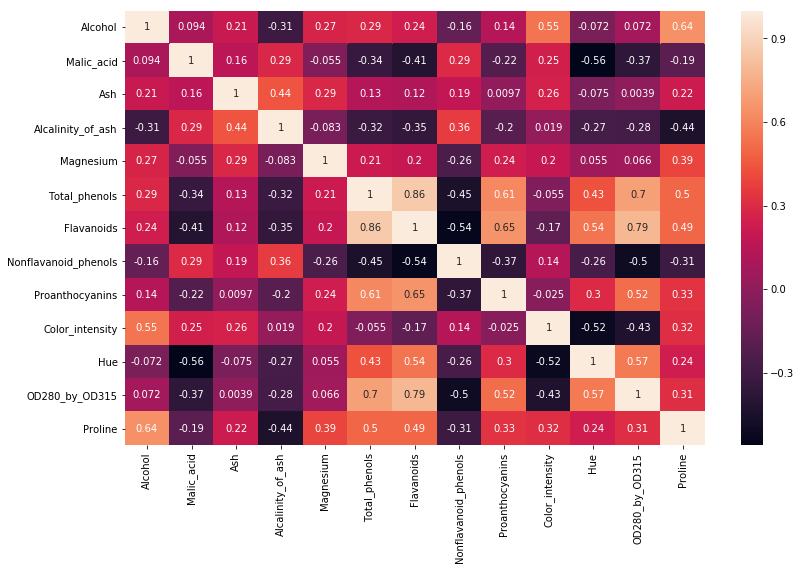

In [68]:
sns.heatmap(correlation_matrix,annot=True)

In [69]:
df['Class'].value_counts() #most common wine class

2    71
1    59
3    48
Name: Class, dtype: int64

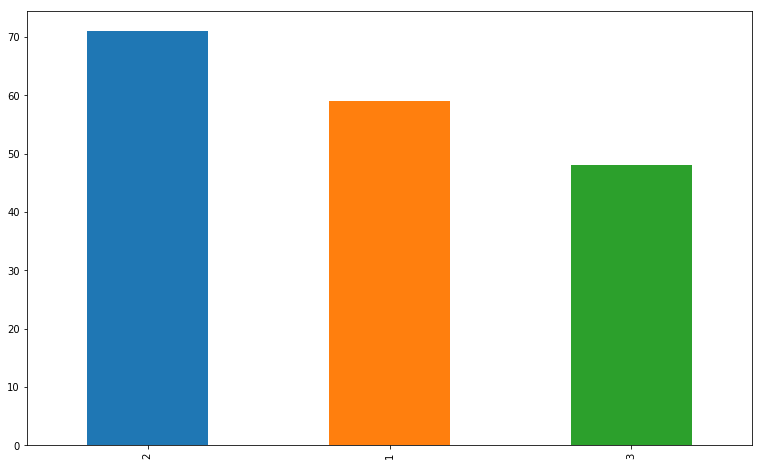

In [70]:
df['Class'].value_counts().plot.bar() #make a quick plot

Lets say I want to know the mean alcohol content for each class of wine.

In [71]:
df.groupby('Class').Alcohol.mean()

Class
1    13.744746
2    12.278732
3    13.153750
Name: Alcohol, dtype: float64

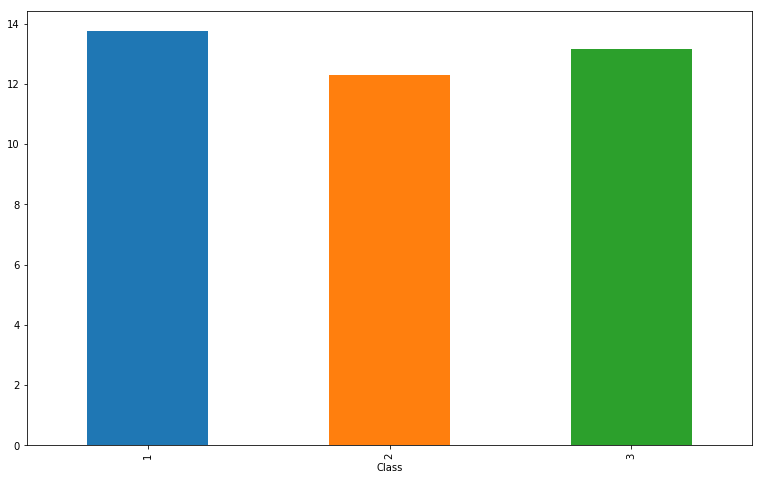

In [72]:
df.groupby('Class').Alcohol.mean().plot(kind='bar')

# Apply

Apply allows us to apply a function over a whole column. Let use apply to add a new feature to the dataframe.

In [76]:
df['Wine_Strength'] = df.Alcohol.apply(lambda x: 'Strong' if x > 14 else 'Normal')

### JHO's Note
This is feature engineering that will be used in machine learning later  
can also use this to change categorical data to numbers

In [77]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_by_OD315,Proline,Wine_Strength
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Strong
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Normal
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Normal
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Strong
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Normal


# Map

Map allows use to apply a dictionary across the dateframe. Pretend for a moment that theres a mistake in the class labels, and class 3 is actually just class 2.

In [81]:
df.Class.unique() #Look at the unique values in the class column

array([1, 2, 3])

In [86]:
class_dict = {1:1,2:2,3:2} #create diction to map classes to new classes

In [87]:
df.Class = df.Class.map(class_dict) #replace all class 3 with class 2

In [88]:
df.Class.unique() 

array([1, 2])


This was a brief introduction to pandas, the best way to learn it is by working though the following resources: 

* [Pandas Exercises](https://github.com/guipsamora/pandas_exercises)
* [Pandas Cookbook](https://github.com/jvns/pandas-cookbook)
* [Pandas Videos](https://www.youtube.com/watch?v=yzIMircGU5I&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=1&t=0s)